In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('../dataset/DataSetKaggle/Resume/relabelledResume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [6]:
df['Category'].value_counts()

Category
BUSINESS-DEVELOPMENT      172
HEALTHCARE                164
INFORMATION-TECHNOLOGY    163
HR                        153
ENGINEERING               148
SALES                     143
ACCOUNTANT                136
TEACHER                   135
CONSULTANT                123
FINANCE                   122
PUBLIC-RELATIONS          111
CONSTRUCTION              110
DESIGNER                  109
CHEF                       98
AVIATION                   95
BANKING                    90
DIGITAL-MEDIA              89
FITNESS                    85
ADVOCATE                   67
APPAREL                    57
BPO                        52
AGRICULTURE                30
ARTS                       23
AUTOMOBILE                  9
Name: count, dtype: int64

### Visualization

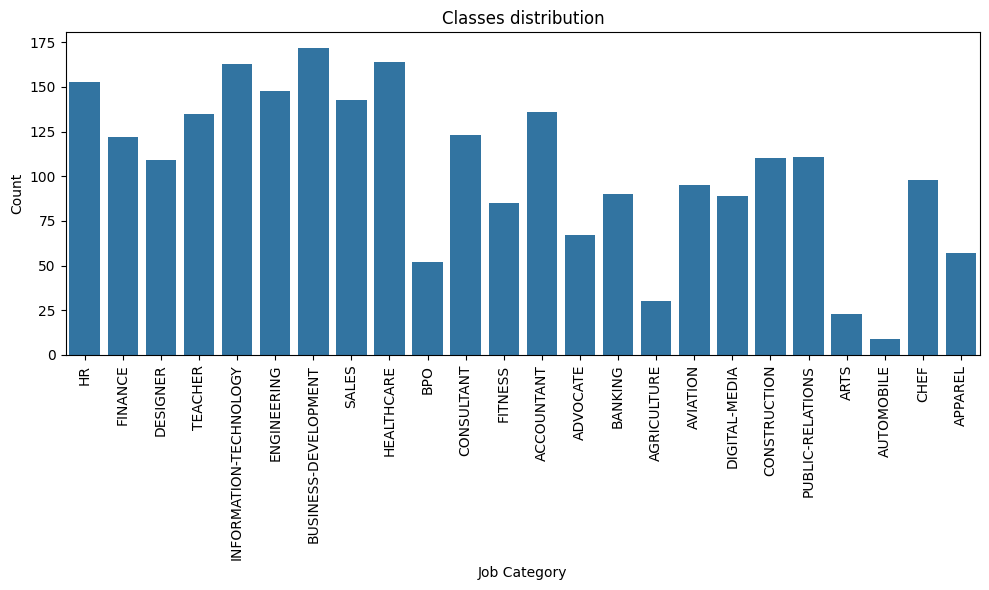

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', order=df['Category'].unique())

plt.title('Classes distribution')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

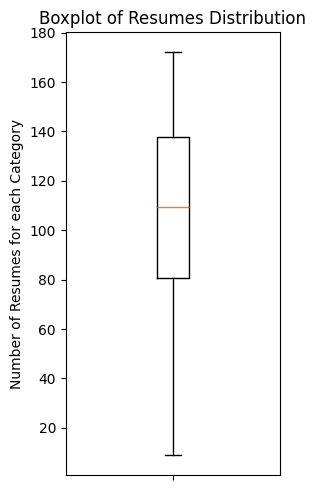

In [8]:
plt.figure(figsize=(3, 5))
plt.boxplot(df['Category'].value_counts())
plt.title('Boxplot of Resumes Distribution')
plt.ylabel('Number of Resumes for each Category')
plt.xticks([1], [""])
plt.tight_layout()
plt.show()

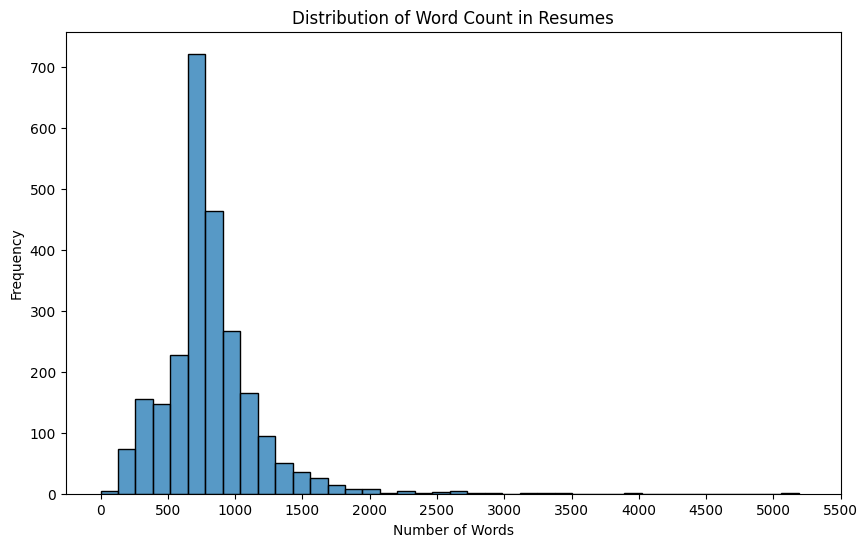

In [9]:
word_count = df['Resume_str'].apply(lambda x: len(str(x).split())) #For each resume, it contains the number of words
max_word_count = word_count.max()

plt.figure(figsize=(10, 6))
sns.histplot(word_count, bins=40)
plt.title('Distribution of Word Count in Resumes')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, max_word_count+500, 500))
plt.show()


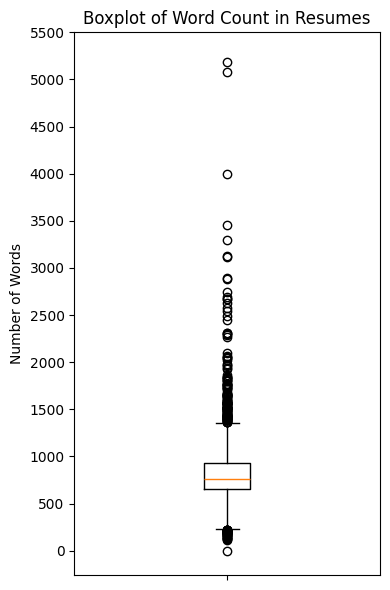

In [10]:
plt.figure(figsize=(4, 6))
plt.boxplot(word_count)
plt.title('Boxplot of Word Count in Resumes')
plt.ylabel('Number of Words')
plt.xticks([1], [""])
plt.yticks(np.arange(0, max_word_count+500, 500))
plt.tight_layout()
plt.show()

In [11]:
desc = word_count.describe()
q1 = word_count.quantile(0.25)
q3 = word_count.quantile(0.75)
iqr = q3 - q1

print("Statistics of Word Count in Resumes:")
print(f"Minimum      : {desc['min']}")
print(f"1st Quartile : {q1}")
print(f"Median       : {desc['50%']}")
print(f"3rd Quartile : {q3}")
print(f"Maximum      : {desc['max']}")
print(f"Mean         : {desc['mean']:.2f}")
print(f"IQR (Q3 - Q1): {iqr}")

Statistics of Word Count in Resumes:
Minimum      : 0.0
1st Quartile : 651.0
Median       : 757.0
3rd Quartile : 933.0
Maximum      : 5190.0
Mean         : 811.33
IQR (Q3 - Q1): 282.0
